## 1. Load and Filter Data
This section loads the original dataset and filters sentences where the 'fuel' column has a negative sentiment.

In [75]:
import pandas as pd

# Load the dataset
file_path = "./data/train_preprocess.csv"
df = pd.read_csv(file_path)

# Filter sentences where fuel is negative
negative_fuel_df = df[df['fuel'] == 'negative'][['sentence']]

# Display a sample of the filtered dataset
print(negative_fuel_df.head())



                                              sentence
1    Avanza kenapa jadi boros bensin begini dah ah....
38   dari segi kenyamanan cortez oke lah, tapi baha...
113  kalau sudah di atas 120 km / jam boros banget ...
116          Rush konde konsumsi BBM yang tetap irit .
124  pengalaman saya punya avanza bahan bakar nya l...


## 2. Text Summarization
This section performs text summarization using the TextRank algorithm from the Sumy library.

In [76]:
import spacy
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the SpaCy Indonesian model
nlp = spacy.blank('id')
nlp.add_pipe('sentencizer')


def custom_tokenizer(text):
    return [token.text for token in nlp(text)]


def enhanced_tokenizer(text):
    # Remove stopwords and non-meaningful tokens
    from nltk.corpus import stopwords
    try:
        stop_words = set(stopwords.words('indonesian'))
    except:
        import nltk
        nltk.download('stopwords')
        stop_words = set(stopwords.words('indonesian'))

    # Your existing custom_tokenizer logic here, plus:
    tokens = custom_tokenizer(text)
    # Remove stopwords and very short tokens
    tokens = [
        token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

def textrank_summarizer(text, num_sentences=5):
    # Tokenize sentences
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    # Convert sentences to TF-IDF vectors
    vectorizer = TfidfVectorizer(tokenizer=enhanced_tokenizer, stop_words=None)
    tfidf_matrix = vectorizer.fit_transform(sentences)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Build the graph and rank sentences
    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)

    # Rank sentences by their TextRank score
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)

    # Create a DataFrame with sentence scores
    sentence_scores_df = pd.DataFrame(ranked_sentences, columns=["Score", "Sentence"])

    # Return summary and sentence scores
    summary = " ".join([sent for _, sent in ranked_sentences[:num_sentences]])
    
    return summary, sentence_scores_df

# Combine sentences into one large text for summarization
text = " ".join(negative_fuel_df['sentence'])
text


# Apply TextRank summarization
summary, sentence_scores = textrank_summarizer(text, 5)

# Display summary
print("Summary:")
print(summary)

# # Display sentence scores
sentence_scores.head()        

Summary:
ampun deh punya xenia uang habis cuma buat konsumsi bensin livina di tempat gue bensin nya asli boros banget kalau soal ngelitik memang iya avanza bahan bakar nya boros banget pengalaman saya punya avanza bahan bakar nya lebih hemat daripada ketika saya punya xenia sudah harga nya mahal, fortuner ini juga konsumsi bahan bakar nya lumayan menguras dompet Asli avanza saya boros akhir-akhir ini walaupun secara keseluruha oke tapi kalo bensinnya boros jadi malas beli ertiga gaya nya oke banget, tarikan juga mantap dan bandel tapi sayang nya boros banget pakai new avanza bu . secara keseluruhan avanza bagus kecuali pemakaian bensin yang boros sekali Masa konsumsi bensin Toyota Avanza Veloz 12,5 liter per kilometer , boros banget anjing kalo gak mau boros jangan beli scoopy xenia 1:8 - 9 boros juga ya juragan , karena bodi besar nya dan cc kecil mungkin ya . dari segi kenyamanan cortez oke lah, tapi bahan bakar nya itu loh boros banget kalau sudah di atas 120 km / jam boros banget a

,Score,Sentence
0,0.126788,ampun deh punya xenia uang habis cuma buat kon...
1,0.115069,pengalaman saya punya avanza bahan bakar nya l...
2,0.109745,secara keseluruhan avanza bagus kecuali pemaka...
3,0.101881,"dari segi kenyamanan cortez oke lah, tapi baha..."
4,0.100000,Baru diisi sudah mau setengah saja .


## 3. Text Similarity
This section computes text similarity between sentences where the fuel column has a negative sentiment.

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(negative_fuel_df['sentence'])

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Display similarity matrix
import pandas as pd
sim_df = pd.DataFrame(similarity_matrix, index=negative_fuel_df['sentence'], columns=negative_fuel_df['sentence'])
print(sim_df)


sentence                                            Avanza kenapa jadi boros bensin begini dah ah. Baru diisi sudah mau setengah saja .  \
sentence                                                                                                                                  
Avanza kenapa jadi boros bensin begini dah ah. ...                                           1.000000                                     
dari segi kenyamanan cortez oke lah, tapi bahan...                                           0.013448                                     
kalau sudah di atas 120 km / jam boros banget a...                                           0.093155                                     
Rush konde konsumsi BBM yang tetap irit .                                                    0.000000                                     
pengalaman saya punya avanza bahan bakar nya le...                                           0.028798                                     
sudah harga nya mahal, fort

## 4. Text Clustering
This section applies clustering techniques on sentences where the fuel column has a negative sentiment.

                                              sentence  cluster
762                avanza bahan bakar nya boros banget        0
38   dari segi kenyamanan cortez oke lah, tapi baha...        0
113  kalau sudah di atas 120 km / jam boros banget ...        0
157  sudah harga nya mahal, fortuner ini juga konsu...        0
342  walaupun secara keseluruha oke tapi kalo bensi...        0
385  ertiga gaya nya oke banget, tarikan juga manta...        0
394  yamaha lexi speed nya gila, tarikan nya juara,...        0
499  Grand Livina XV AT 2008 ngelitik nya parah kak...        0
448  xenia 1:8 - 9 boros juga ya juragan , karena b...        0
632  ampun deh punya xenia uang habis cuma buat kon...        1
626  Dari semua merek mobil yang pernah saya pakai ...        1
581                vario jauh lebih boros daripada mio        1
555  Ini gue saja yang merasa bensin Xenia boros ba...        1
1    Avanza kenapa jadi boros bensin begini dah ah....        1
418  Masa konsumsi bensin Toyota Avanza 

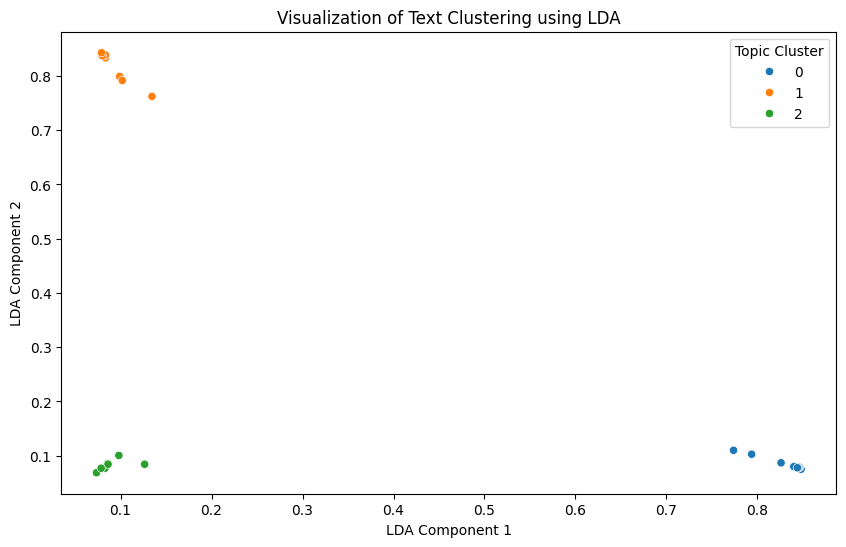

In [78]:
from sklearn.cluster import KMeans

# Choose number of clusters (can be adjusted)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
negative_fuel_df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Display clustered sentences
print(negative_fuel_df[['sentence', 'cluster']].sort_values(by='cluster'))


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

# Perform LDA for topic modeling
num_topics = 3  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Assign the most probable topic to each sentence
negative_fuel_df['LDA_Topic'] = np.argmax(lda_matrix, axis=1)

# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lda_matrix[:, 0], y=lda_matrix[:, 1], hue=negative_fuel_df['LDA_Topic'], palette="tab10")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("Visualization of Text Clustering using LDA")
plt.legend(title="Topic Cluster")
plt.show()

        



In [79]:
# Function to display the top words for each topic
def display_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    
    # Convert topics to a DataFrame for display
    topics_df = pd.DataFrame(topics)
    
    return topics_df

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic
topics = display_topics(lda, feature_names)
topics.head()

,Topic 0,Topic 1,Topic 2
0,nya,boros,punya
1,avanza,juga,memang
2,boros,nya,xenia
3,bakar,ya,yang
4,bahan,oke,saya


In [80]:
# Function to display the top words for each topic per cluster
def display_cluster_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx}"] = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
    
    # Convert topics to a DataFrame for display
    topics_df = pd.DataFrame(topics)

    # Associate topics with clusters
    cluster_topics = negative_fuel_df[['sentence', 'LDA_Topic']].copy()
    cluster_topics['Topic Words'] = cluster_topics['LDA_Topic'].apply(lambda x: ", ".join(topics_df[f"Topic {x}"]))
    
    return cluster_topics

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Display the top words in each topic per cluster
topic_cluster = display_cluster_topics(lda, feature_names)
topic_cluster.head()        

,sentence,LDA_Topic,Topic Words
1,Avanza kenapa jadi boros bensin begini dah ah....,0,"nya, avanza, boros, bakar, bahan, banget, akhi..."
38,"dari segi kenyamanan cortez oke lah, tapi baha...",0,"nya, avanza, boros, bakar, bahan, banget, akhi..."
113,kalau sudah di atas 120 km / jam boros banget ...,2,"punya, memang, xenia, yang, saya, gue, iya, be..."
116,Rush konde konsumsi BBM yang tetap irit .,1,"boros, juga, nya, ya, oke, tapi, dan, mio, var..."
124,pengalaman saya punya avanza bahan bakar nya l...,2,"punya, memang, xenia, yang, saya, gue, iya, be..."


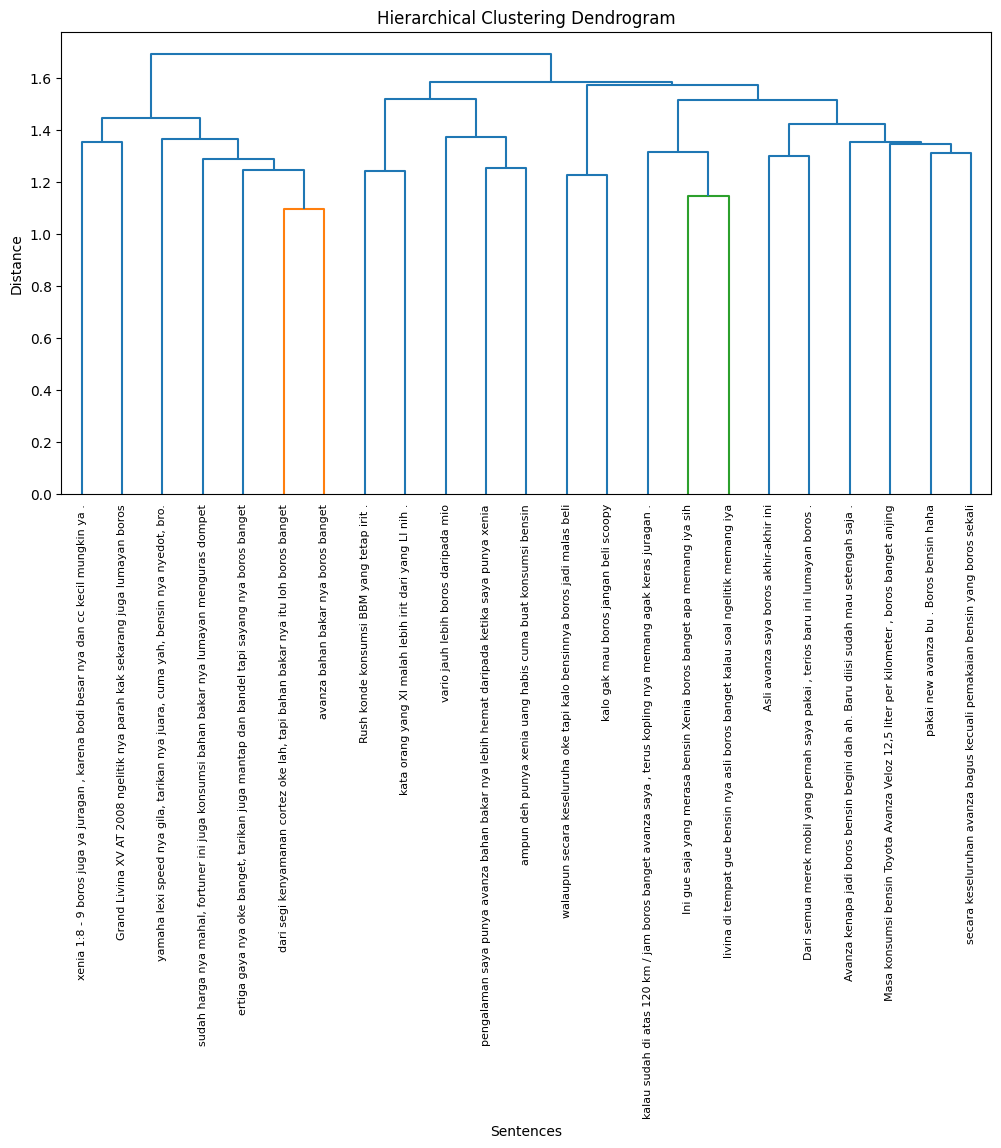

In [81]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = sch.linkage(tfidf_matrix.toarray(), method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix, labels=negative_fuel_df['sentence'].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sentences")
plt.ylabel("Distance")
plt.show()
        

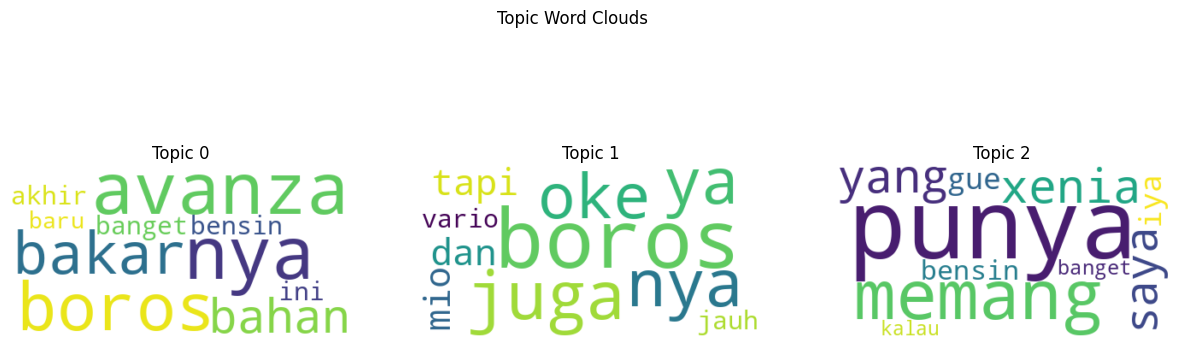

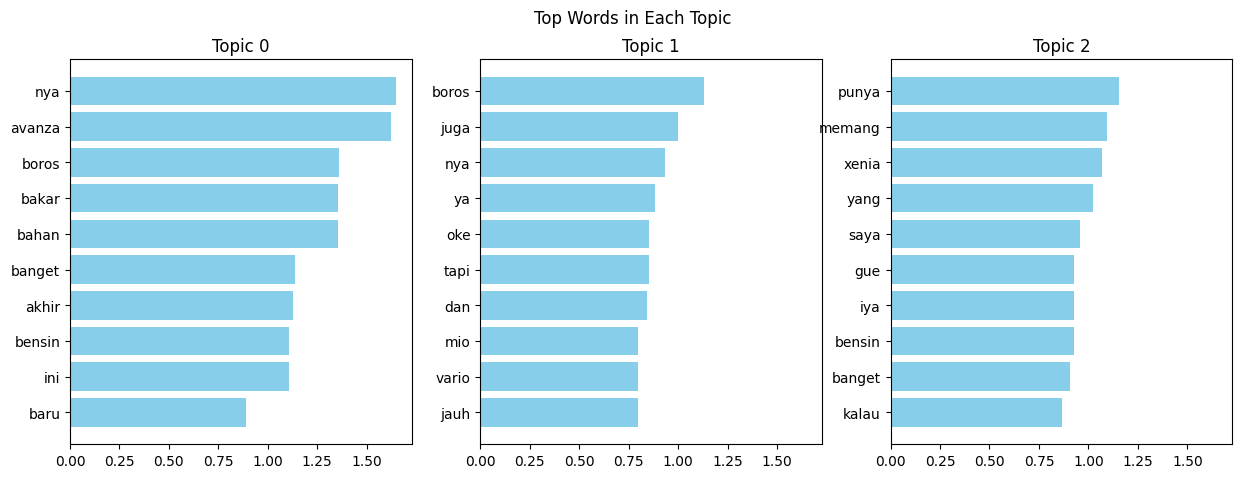

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Function to plot word clouds for topics
def plot_word_clouds(model, feature_names, num_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 5))
    for topic_idx, topic in enumerate(model.components_):
        word_freqs = {feature_names[i]: topic[i] for i in topic.argsort()[:-num_words - 1:-1]}
        wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_freqs)
        axes[topic_idx].imshow(wordcloud, interpolation='bilinear')
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic {topic_idx}")
    plt.suptitle("Topic Word Clouds")
    plt.show()

# Function to plot bar charts of top words per topic
def plot_top_words(model, feature_names, num_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(15, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_indices = topic.argsort()[:-num_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        top_weights = topic[top_features_indices]

        axes[topic_idx].barh(top_features, top_weights, color='skyblue')
        axes[topic_idx].invert_yaxis()
        axes[topic_idx].set_title(f"Topic {topic_idx}")

    plt.suptitle("Top Words in Each Topic")
    plt.show()

# Get feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Plot word clouds and top words for topics
plot_word_clouds(lda, feature_names)
plot_top_words(lda, feature_names)

## 5. Clustering using word2vec

In [83]:
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.0

    for word in words:
        if word in vocabulary:
            nwords += 1.0
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


# Function to vectorize sentences using the Word2Vec model
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)  # Get vocabulary words
    features = [
        average_word_vectors(tokenized_sentence, model,
                             vocabulary, num_features)
        for tokenized_sentence in corpus
    ]
    return np.array(features)

Epoch: 1, Loss: 0.0
Epoch: 2, Loss: 0.0
Epoch: 3, Loss: 0.0
Epoch: 4, Loss: 0.0
Epoch: 5, Loss: 0.0
Epoch: 6, Loss: 0.0
Epoch: 7, Loss: 0.0
Epoch: 8, Loss: 0.0
Epoch: 9, Loss: 0.0
Epoch: 10, Loss: 0.0
Epoch: 11, Loss: 0.0
Epoch: 12, Loss: 0.0
Epoch: 13, Loss: 0.0
Epoch: 14, Loss: 0.0
Epoch: 15, Loss: 0.0
Epoch: 16, Loss: 0.0
Epoch: 17, Loss: 0.0
Epoch: 18, Loss: 0.0
Epoch: 19, Loss: 0.0


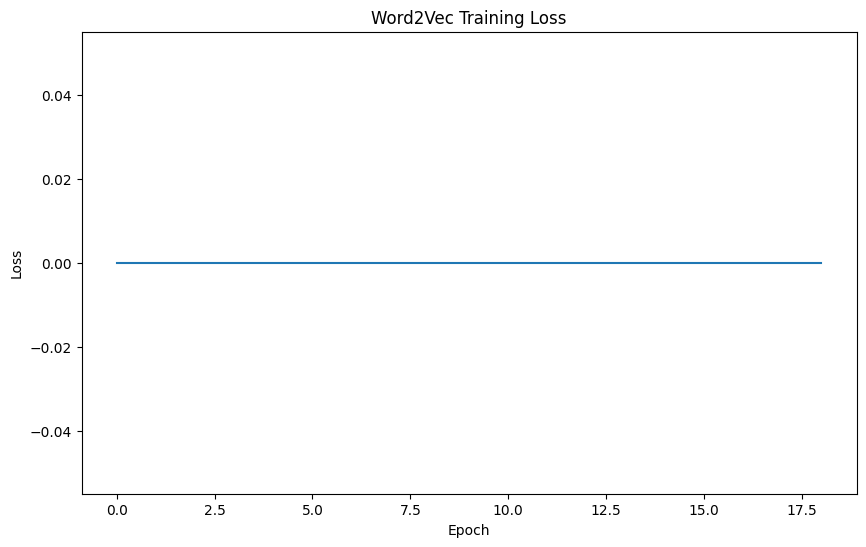


Words similar to 'mobil':
  lcgc: 0.9937
  Confero: 0.9937
  murahan: 0.9933
  bangga: 0.9930
  Harga: 0.9929
  juta: 0.9929
  memilih: 0.9928
  indonesia: 0.9928
  Formo: 0.9927
  ragu: 0.9926

Words similar to 'bensin':
  liter: 0.9878
  12,5: 0.9846
  kak: 0.9841
  boros: 0.9838
  xenia: 0.9832
  kilometer: 0.9827
  ngelitik: 0.9825
  BBM: 0.9824
  menguras: 0.9821
  dompet: 0.9814

Words similar to 'boros':
  avanza: 0.9841
  bensin: 0.9838
  ngelitik: 0.9816
  kak: 0.9815
  120: 0.9804
  liter: 0.9799
  diisi: 0.9787
  penuh: 0.9786
  jam: 0.9775
  12,5: 0.9774

Words similar to 'avanza':
  penuh: 0.9876
  juragan: 0.9875
  nya: 0.9865
  cortez: 0.9849
  120: 0.9841
  boros: 0.9841
  mewah: 0.9837
  kenyamanan: 0.9836
  diisi: 0.9830
  menguras: 0.9830

Words similar to 'bbm':
  kota: 0.9915
  lumayan: 0.9874
  BBM: 0.9857
  dompet: 0.9837
  dikendarai: 0.9831
  Rush: 0.9828
  Beat: 0.9818
  dipakai: 0.9816
  bawa: 0.9812
  terbukti: 0.9811

Words similar to 'konsumsi':
  hemat: 

In [84]:
import gensim
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np
import matplotlib.pyplot as plt

# Loss tracking callback
class EpochLogger(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
        self.losses = []
        
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            self.loss_previous_step = loss
        else:
            current_loss = loss - self.loss_previous_step
            self.losses.append(current_loss)
            self.loss_previous_step = loss
            print(f'Epoch: {self.epoch}, Loss: {current_loss}')
        self.epoch += 1





all_sentences = []
for df in [df, negative_fuel_df]:  
    if 'sentence' in df.columns:
        tokenized = [enhanced_tokenizer(sent) for sent in df['sentence']]
        all_sentences.extend(tokenized)

# Initialize callback
epoch_logger = EpochLogger()

# Train an enhanced Word2Vec model
w2v_model = Word2Vec(
    sentences=all_sentences,
    vector_size=200,         # Increased from 100
    window=6,                # Context window size
    min_count=2,             # Ignore words that appear less than this
    sg=1,                    # Use skip-gram (1) instead of CBOW (0)
    hs=0,                    # Use negative sampling instead of hierarchical softmax
    negative=10,             # Number of negative samples per positive sample
    ns_exponent=0.75,        # Negative sampling distribution exponent
    seed=42,                 # For reproducibility
    workers=4,               # Parallel processing 
    epochs=20,               # More training iterations
    callbacks=[epoch_logger] # Track training progress
)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(epoch_logger.losses)
plt.title('Word2Vec Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



# Evaluate similarity for key terms
test_words = ["mobil", "bensin", "boros", "avanza", "bbm", "konsumsi"]
for word in test_words:
    if word in w2v_model.wv:
        similar = w2v_model.wv.most_similar(word, topn=10)
        print(f"\nWords similar to '{word}':")
        for term, score in similar:
            print(f"  {term}: {score:.4f}")

# Visualization of word embeddings using PCA


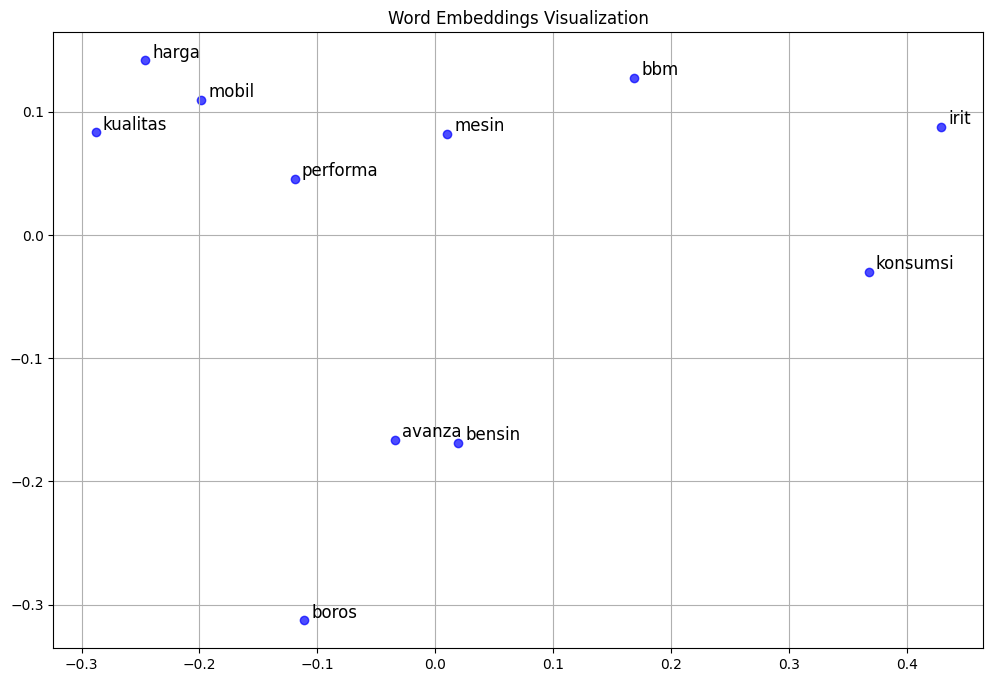

In [85]:
from sklearn.decomposition import PCA


def plot_word_vectors(model, words):
    # Extract vectors for the words
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    words_found = [word for word in words if word in model.wv]

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0],
                reduced_vectors[:, 1], c='blue', alpha=0.7)

    # Add labels for each point
    for i, word in enumerate(words_found):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]),
                     xytext=(5, 2), textcoords='offset points',
                     fontsize=12, color='black')

    plt.title('Word Embeddings Visualization')
    plt.grid(True)
    plt.show()


# Visualize vectors for automotive terms
automotive_terms = ["mobil", "bensin", "bahan_bakar", "avanza", "bbm", "konsumsi",
                    "boros", "irit", "mesin", "performa", "harga", "kualitas"]
plot_word_vectors(w2v_model, automotive_terms)

In [87]:
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
# Tokenize the sentences for word2vec vectorization
tokenized_sentences = [enhanced_tokenizer(sent) for sent in negative_fuel_df['sentence']]

# Generate feature vectors using Word2Vec model
w2v_feature_array = averaged_word_vectorizer(
    corpus=tokenized_sentences, model=w2v_model, num_features=w2v_model.vector_size
)

# Check the feature array
print(f"Shape of word2vec features: {w2v_feature_array.shape}")

# Apply Affinity Propagation clustering
ap = AffinityPropagation(damping=0.9, max_iter=1000, random_state=42)
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_

# Add cluster labels to the dataframe
negative_fuel_df['W2V_ClusterLabel'] = cluster_labels

# Display statistics about clusters
print(f"\nNumber of clusters found: {len(np.unique(cluster_labels))}")
cluster_counts = negative_fuel_df['W2V_ClusterLabel'].value_counts()
print("Cluster distribution:")
print(cluster_counts)

# Display the clustered sentences
print("\nClustered sentences:")
print(negative_fuel_df[['sentence', 'W2V_ClusterLabel']].sort_values(by='W2V_ClusterLabel'))



Shape of word2vec features: (23, 200)

Number of clusters found: 4
Cluster distribution:
W2V_ClusterLabel
0    12
2     5
3     5
1     1
Name: count, dtype: int64

Clustered sentences:
                                              sentence  W2V_ClusterLabel
1    Avanza kenapa jadi boros bensin begini dah ah....                 0
632  ampun deh punya xenia uang habis cuma buat kon...                 0
626  Dari semua merek mobil yang pernah saya pakai ...                 0
581                vario jauh lebih boros daripada mio                 0
517  kata orang yang XI malah lebih irit dari yang ...                 0
499  Grand Livina XV AT 2008 ngelitik nya parah kak...                 0
448  xenia 1:8 - 9 boros juga ya juragan , karena b...                 0
418  Masa konsumsi bensin Toyota Avanza Veloz 12,5 ...                 0
641  livina di tempat gue bensin nya asli boros ban...                 0
407  secara keseluruhan avanza bagus kecuali pemaka...                 0
276        

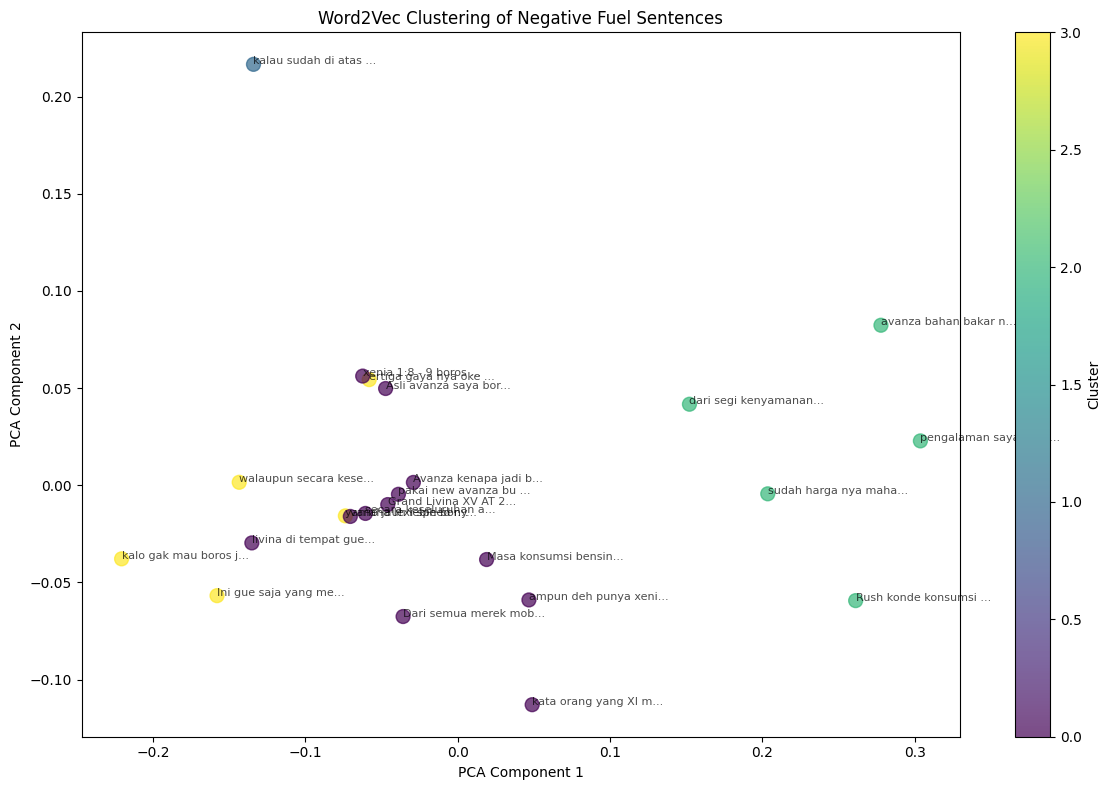

In [88]:
# Visualize the clusters

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(w2v_feature_array)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1],
                      c=cluster_labels, cmap='viridis', alpha=0.7, s=100)

# Add labels for points
for i, txt in enumerate(negative_fuel_df['sentence'].str[:20] + '...'):
    plt.annotate(txt, (reduced_features[i, 0], reduced_features[i, 1]),
                 fontsize=8, alpha=0.7)

plt.colorbar(scatter, label='Cluster')
plt.title('Word2Vec Clustering of Negative Fuel Sentences')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()